## Korelace

- Analyzuje vztah mezi proměnnými a definuje sílu tohoto vztahu.
- Je součástí předběžných analýz před prováděním složitějších statistických metod.
- Neříká, že věci se navzájem ovlivňují (korelace není kauzalita)
- Existují i tzv. falešné korelace, kdy spočtená vysoká korealce je způsobena náhodou nebo skrytou proměnnou.
- Síla vztahu je vyjádřena tzv. korelačním koeficientem.
- Hodnota  korelačního koeficientu se pohybuje od -1 (perfektní negativní korelace) až 1 (perfektní pozitivní korelace)

<p>

- Za pomoci metody corr() lze zobrazit korelační matici s informacemi o korelaci mezi číselnými sloupci dataframe, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- Za pomoci metody corr() volané nad sloupcem lze vypočítat korelační koeficient mezi dvěmi sloupci, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- Za pomoci metody corrwith() lze spočítat korelaci mezi řádky či sloupci dvou dataframe, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html
- Za pomoci metody plot.scatter() ze vizualizovat korelační diagram, viz https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
- DataFrame může být použit jako vstupní argument vizuálů knihovny Seaborn

### Typy vztahů
- Lineární vztah: Jedna proměnná se mění přímo úměrně k jiné proměnné. 
- Monotónní vztah: S nárůtsem jedné proměnné roste či klesá jiná proměnná, ne však konstantní rychlostí.

### Měření linearity
- Za pomoci scatter plotu (bodový graf)


## Korelace


### Pearsonův korelační koeficient
- Měří lineární vztah mezi dvěma spojitými proměnnými.
- Za pomoci koeficientu determinace posuzujeme sílu vztahu mezi proměnnými.

**Vzorec koeficientu determinace**

$$
\begin{align*}
R^2 = r^2
\end{align*}
$$

$$
\begin{align*}
R^2 &: \text{Koeficient determinace} \\
r &: \text{Pearsonův korelační koeficient mezi dvěma proměnnými}
\end{align*}

$$

**Příklady**:
- Měření vztahu  mezi výškou a váhou.
- Měření vztahu mezi dobou studia a studijními výsledky.
- Měření vztahu mezi věkem a příjmem.

**Vzorec Pearsonova korelačního koeficientu:**
$$
\begin{align*}
\text{Pearsonův koeficient (r)}: \quad r = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}
{\sqrt{\sum_{i=1}^{n} (X_i - \overline{X})^2 \sum_{i=1}^{n} (Y_i - \overline{Y})^2}}
\end{align*}

$$
$$
\begin{align*}
r &: \text{Pearsonův korelační koeficient} \\
X_i &: \text{Hodnoty proměnné } X \text{ pro každé } i \\
Y_i &: \text{Hodnoty proměnné } Y \text{ pro každé } i \\
\overline{X} &: \text{Průměr hodnot proměnné } X \\
\overline{Y} &: \text{Průměr hodnot proměnné } Y \\
n &: \text{Počet pozorování}
\end{align*}

$$

### Spearmanův korelační koeficient
- Měří sílu nelineárního vztahu (s tím si Pearsonův korelační koeficient neví rady).
- Používá se při práci s ordinálními proměnnými (diskrétní proměnné s přirozeným uspořádáním) či situaci, kdy data nejsou normálně distribuována.
- V porovnání s Kendalův tau koeficientem je stabilnější u větších datových sad.

**Příklady:** 
- Měření vztahu mezi vzděláním (základní, středoškolské, vysokoškolské) a příjmem.
- Měření vztahu mezi hodnocením zdravotního vztahu (špatný, neutrální, dobrý) a věkem.

**Vzorec:**

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$
$$
\begin{align*}
\rho &: \text{Spearmanův pořadový korelační koeficient} \\
d_i &: \text{Rozdíl mezi pořadími jednotlivých párů hodnot} \\
n &: \text{Počet pozorování}
\end{align*}

$$

### Kendalův tau koeficient
- Měří vztah mezi proměnnými na základě jejich pořadí
- V porovnání se Spearmanovým korelačním koeficientem si lépe poradí s menšími vzorky dat
- Je méně citlivý na extrémní hodnoty ve vzorku než Spearmanův korelační koeficient.
- Měří počet konzistentních a nekonzistentních párů mezi hodnotami.

Příklady: 
- Měření vztahu preferencí produktu v závislosti na věk (obě proměnné jsou ordinální)

Vzorec

$$
\tau = \frac{2}{n(n-1)} \sum_{i<j} \text{sign}(x_i - x_j) \cdot \text{sign}(y_i - y_j)
$$
$$
\begin{align*}
\tau &: \text{Kendallův tau koeficient} \\
x_i, y_i &: \text{Hodnoty proměnných } X \text{ a } Y \text{ pro každé } i \\
\text{sign} &: \text{Signum funkce, která určuje znaménko rozdílu} \\
n &: \text{Počet pozorování}
\end{align*}

$$

<Axes: xlabel='TMAX', ylabel='TMIN'>

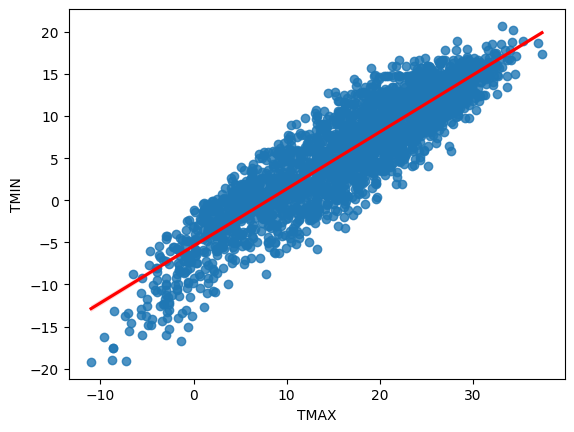

In [9]:
# Vizualizace korelace mezi dvěma proměnnými
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df = df[(df['NAME']=='RUZYNE')]
df = df.dropna(subset=['PRCP','TMAX'])

# Přidáme do grafu přímku regrese

sns.regplot(x='TMAX', y='TMIN', data=df, line_kws={'color':'red'})



In [11]:
import pandas as pd

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau


df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df = df[(df['NAME']=='RUZYNE')]
df = df.dropna(subset=['PRCP','TMAX'])


# Výpočet Pearsonovy korelace
pearson_corr_tmax, p_value_tmax_pearson = pearsonr(df['TMAX'], df['PRCP'])
# Výpočet Spearmanovy korelace
spearman_corr, p_value = spearmanr(df['TMAX'], df['PRCP'])

# Výpočet Kendallovy korelace
kendall_corr, p_value = kendalltau(df['TMAX'], df['PRCP'])

print('Pearsonova korelace: ', pearson_corr_tmax)
print('Spearmanova korelace: ', spearman_corr)
print('Kendallova korelace: ', kendall_corr)



Pearsonova korelace:  0.053256223286683856
Spearmanova korelace:  -0.06277687269985281
Kendallova korelace:  -0.04398000540543963


In [7]:
# Vypocet korelacniho koefecientu mezi dvemi sloupci za pomoci vychozi, tj. Pearsonovy metody
df[ 'TMAX'].corr(df['TMIN'])


0.8975982165716555

In [6]:
# Zobrazeni korelacni matice
df[['PRCP','SNWD','TAVG','TMAX','TMIN']].corr()


PRCP      SNWD      TAVG      TMAX      TMIN
PRCP  1.000000  0.055676  0.098533  0.053256  0.151413
SNWD  0.055676  1.000000 -0.157873 -0.178589 -0.144580
TAVG  0.098533 -0.157873  1.000000  0.983844  0.954226
TMAX  0.053256 -0.178589  0.983844  1.000000  0.897598
TMIN  0.151413 -0.144580  0.954226  0.897598  1.000000

In [ ]:
import seaborn as sns
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df = df[(df['NAME']=='RUZYNE')]
df =df[['TMAX','PRCP','TMIN']]


mask = np.triu(np.ones_like(df.corr('kendall')))
dataplot = sns.heatmap(df.corr('kendall'), cmap="YlGnBu", annot=True, mask=mask)

Korelace mezi PRCP v MOSNOV a RUZYNE

In [30]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')



df_ruzyne = df[(df['NAME']=='RUZYNE')]
df_mosnov = df[(df['NAME']=='MOSNOV')]
df_ruzyne = df_ruzyne[['DATE','PRCP']]
df_mosnov = df_mosnov[['DATE','PRCP']]

datumy_ruzyne = df_ruzyne['DATE'].values
df_mosnov = df_mosnov.loc[df_mosnov['DATE'].isin(datumy_ruzyne)]
df_ruzyne.reset_index(drop=True, inplace=True)
df_mosnov.reset_index(drop=True, inplace=True)
df_ruzyne['PRCP'].corr(df_mosnov['PRCP'])




0.1440673716244168